# 8. Content-based filtering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
%run "01.Recommendation_Loading.ipynb"

################  Recommendations (all data, positive recommendations only) ################
Users: 12,636,209
Games: 37,419
Number of users 10,000
First five users id [11203022 12827342 11719330  9553563 11051045]
################  Recommendations (Sample) ################
Minimum number of recommendations to be included in the sample: 20
Number of randomly selected users: 10000
Users: 9,688
Games: 20,615
################ User-Game Matrix ################
Number of Rows: 9,689
Numbeer of Columns: 20,616
Number of stored values: 365,753


In [3]:
%run "04.Games_Exploration.ipynb"

There are 50872 distinct games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
There are 50872 distinct games


/var/folders/h5/_4d00bcd69b71883jm4jldn40000gn/T/ipykernel_27366/2151291458.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_joined.groupby("_merge").count()["app_id"]


There are 441 tags
The top 10 tags with their respective count are: [('Indie', 27957), ('Singleplayer', 22566), ('Action', 21897), ('Adventure', 20183), ('Casual', 17844)]
<class 'pandas.core.frame.DataFrame'>
Index: 49628 entries, 10 to 2515460
Columns: 441 entries, 1980s to eSports
dtypes: int8(441)
memory usage: 21.3 MB


In [4]:
matrix_games_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49628 entries, 10 to 2515460
Columns: 441 entries, 1980s to eSports
dtypes: int8(441)
memory usage: 21.3 MB


### Dimensionality Reduction

Principal Component Analysis is conducted to reduce the number of game tags.

In [5]:
pca = PCA(n_components=len(matrix_games_tags.columns))
pca.fit(matrix_games_tags)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

The suitable value of k for PCA with a threshold of 0.95 is: 247


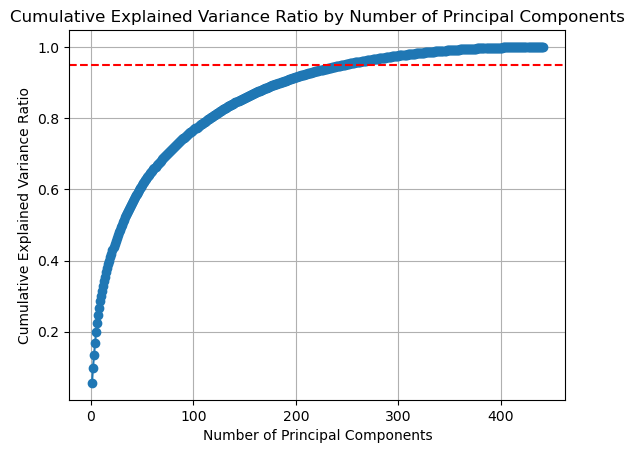

In [6]:
# Finding the suitable value of k
k = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("The suitable value of k for PCA with a threshold of 0.95 is:", k)

# View cumulative explained variance ratio with threshold
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='Threshold: 0.95')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

In [9]:
N = 10
k = 250
# Dimensionality Reduction: Apply PCA
pca = PCA(n_components=k)  # Set the desired number of components, k
reduced_features = pca.fit_transform(matrix_games_tags)

# Convert the reduced_features array back to a DataFrame
reduced_matrix_games_tags = pd.DataFrame(reduced_features, index=matrix_games_tags.index)

# Content-based Filtering (Similarity)
# Calculate similarity matrix
similarity_matrix = cosine_similarity(reduced_matrix_games_tags)

In [17]:
# Example on one game
selected_game_id = 12345  # Choose the game ID for which you want to find similar games
similarity_scores = similarity_matrix[selected_game_id]
similar_games_indices = similarity_scores.argsort()[::-1][:N]  # Select top N similar games

recommended_games = matrix_games_tags.iloc[similar_games_indices].index.tolist()

In [14]:
%run "Get_Training_and_Test_Instances.ipynb"

################  Get Test Data ################


/var/folders/h5/_4d00bcd69b71883jm4jldn40000gn/T/ipykernel_27366/520038405.py:7: FutureWarning: The provided callable <function nanmax at 0x107c77560> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_df = df.groupby("user_id_categorical").agg({"date": np.nanmax}).reset_index()
/var/folders/h5/_4d00bcd69b71883jm4jldn40000gn/T/ipykernel_27366/520038405.py:9: FutureWarning: The provided callable <function nanmax at 0x107c77560> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rec_df = df.groupby("user_id_categorical").agg({"app_id_categorical": np.nanmax}).reset_index()


x_test.shape: (9688, 2)
y_test.shape: (9688, 1)
Number of Users: 9,689
Number of Games: 20,616
Number of Negatives Sample per User-Game: 2
################  Get Training Data ################
x_train.shape: (1094928, 2)
y_train.shape: (1094928, 2)


In [ ]:
hgr_sim_list = []
for k in range(50):
    recommendations_sim = get_similar_games(X_test, k)
    hgr_sim = eval_hit_ratio_sim(recommendations_sim, x_test)
    hgr_sim_list.append(hgr_sim)
    print("Top @", k, "popular games,", "Hit Gain Ratio", '{0:.4%}'.format(hgr_sim))
    

In [ ]:
plt.plot(hgr_sim_list, label="Hit Gain Ratio")
plt.title("Content-based Model")
plt.xlabel("Top @K similar games")
plt.ylabel("HGR")
plt.legend()
plt.show()